# Thông tin
1. **MSSV:** 22521586
2. **Họ Tên:** Trần Võ Lâm Trường
3. **Bài tập:** Bài tập 6
4. **Ngày thực hiện:** 21/5/2024  



# .

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=664a86f25eadf35558e0de25b01398fd89be0800c0e3b8615211771ecab3d5fd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import os
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import MeanShift, estimate_bandwidth
from skfuzzy.cluster import cmeans
from matplotlib import pyplot as plt

In [ ]:
baitap6 = '/gdrive/MyDrive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2/Baitap/Baitap6/images/'

# Yêu cầu 1

In [ ]:
img_dir_1 = os.path.join(baitap6, 'vegetables.jpg')
img_dir_2 = os.path.join(baitap6, 'hand.jpg')
img_dir_3 = os.path.join(baitap6, 'thuoc.jpg')
img_dir_4 = os.path.join(baitap6, 'dogcat.jpg')

## MeanShift

In [ ]:
def MeanShift_RGB_XY(img):
    nrow, ncol, nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img[y, x][0], img[y, x][1], img[y, x][2], x, y]
            g.append(tmp)

    g = np.array(g)

    # Ước lượng bandwidth tự động
    bandwidth = estimate_bandwidth(g, quantile=0.1, n_samples=500)
    print(f"Estimated bandwidth: {bandwidth}")

    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(g)

    labels = meanshift.labels_
    cluster_centers = meanshift.cluster_centers_

    unique_labels = np.unique(labels)
    print(f"Number of clusters: {len(unique_labels)}")

    arrcolor = np.random.rand(len(unique_labels), 3) * 255
    t = arrcolor[labels]

    img_res = img.copy()
    i = 0
    for y in range(nrow):
        for x in range(ncol):
            img_res[y, x] = t[i][0:3]
            i += 1

    return img_res.astype(np.uint8)

In [ ]:
def MeanShift_RGB(img, quantile=0.1, n_samples=500):
    nrow, ncol, nchl = img.shape
    g = img.reshape(-1, nchl)

    # Ước lượng bandwidth tự động
    bandwidth = estimate_bandwidth(g, quantile=quantile, n_samples=n_samples)
    print(f"Estimated bandwidth: {bandwidth}")

    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(g)

    labels = meanshift.labels_
    cluster_centers = meanshift.cluster_centers_

    unique_labels = np.unique(labels)
    print(f"Number of clusters: {len(unique_labels)}")

    img_res = cluster_centers[labels].reshape(nrow, ncol, nchl)
    return img_res.astype(np.uint8)

### (r, g, b)

Estimated bandwidth: 36.15495072730696
Number of clusters: 5


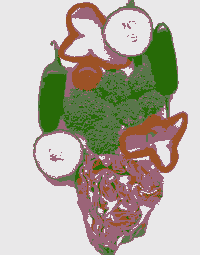

In [ ]:
img_1 = cv.imread(img_dir_1)

img_ms_1 = MeanShift_RGB(img_1)

cv2_imshow(img_ms_1)

Estimated bandwidth: 28.478433089011812
Number of clusters: 3


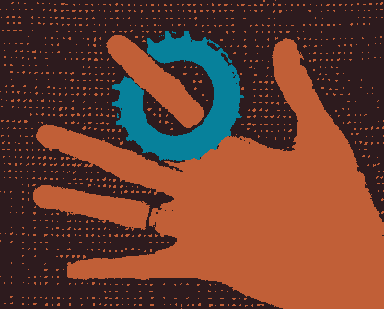

In [ ]:
img_2 = cv.imread(img_dir_2)

img_ms_2 = MeanShift_RGB(img_2)

cv2_imshow(img_ms_2)

Estimated bandwidth: 34.685347504318756
Number of clusters: 7


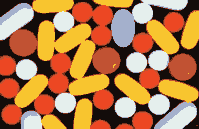

In [ ]:
img_3 = cv.imread(img_dir_3)

img_ms_3 = MeanShift_RGB(img_3)

cv2_imshow(img_ms_3)

Estimated bandwidth: 22.15104316438868
Number of clusters: 5


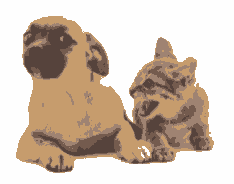

In [ ]:
img_4 = cv.imread(img_dir_4)

img_ms_4 = MeanShift_RGB(img_4)

cv2_imshow(img_ms_4)

### (r, g, b, x, y)

Estimated bandwidth: 86.29267210210273
Number of clusters: 7


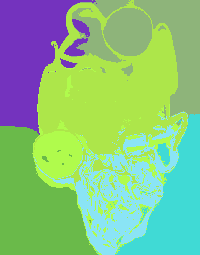

In [ ]:
img_ms_5 = MeanShift_RGB_XY(img_1)

cv2_imshow(img_ms_5)

Estimated bandwidth: 91.83222064829808
Number of clusters: 5


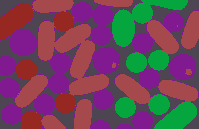

In [ ]:
img_ms_6 = MeanShift_RGB_XY(img_3)

cv2_imshow(img_ms_6)

## FCM

In [ ]:
def FCM_RGB(img, n_clusters, fuzziness=2, max_iter=100, tol=0.0001):
    nrow, ncol, nchl = img.shape
    g = img.reshape(-1, nchl)

    # Apply FCM
    cntr, u, _, _, _, _, _ = cmeans(
        g.T, n_clusters, fuzziness, error=tol, maxiter=max_iter, init=None
    )

    labels = np.argmax(u, axis=0)

    img_res = cntr[labels].reshape(nrow, ncol, nchl)
    return img_res.astype(np.uint8)

In [ ]:
def FCM_RGB_XY(img, n_clusters):
    nrow, ncol, nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img[y, x][0], img[y, x][1], img[y, x][2], x, y]
            g.append(tmp)

    g = np.array(g).T

    # Áp dụng thuật toán FCM
    cntr, u, u0, d, jm, p, fpc = cmeans(
        g, n_clusters, 2, error=0.005, maxiter=1000, init=None)

    # Lấy nhãn cụm
    labels = np.argmax(u, axis=0)

    unique_labels = np.unique(labels)
    print(f"Number of clusters: {len(unique_labels)}")

    arrcolor = np.random.rand(len(unique_labels), 3) * 255
    t = arrcolor[labels]

    img_res = img.copy()
    i = 0
    for y in range(nrow):
        for x in range(ncol):
            img_res[y, x] = t[i][0:3]
            i += 1

    return img_res.astype(np.uint8)


### (r, g, b)

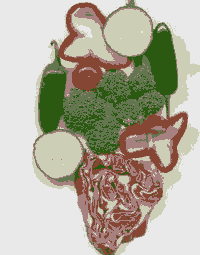

In [ ]:
img_fcm_1 = FCM_RGB(img_1, 6)

cv2_imshow(img_fcm_1)

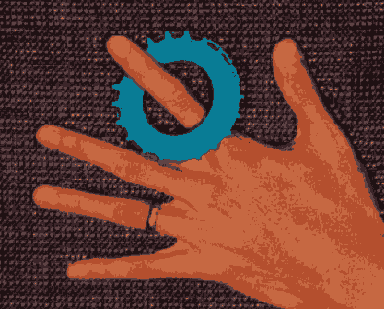

In [ ]:
img_fcm_2 = FCM_RGB(img_2, 6)

cv2_imshow(img_fcm_2)

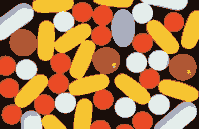

In [ ]:
img_fcm_3 = FCM_RGB(img_3, 6)

cv2_imshow(img_fcm_3)

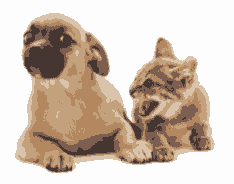

In [ ]:
img_fcm_4 = FCM_RGB(img_4, 6)

cv2_imshow(img_fcm_4)

### (r, g, b, x, y)

Number of clusters: 6


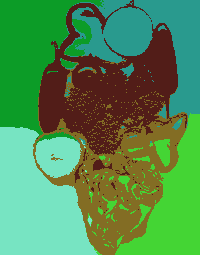

In [ ]:
img_fcm_5 = FCM_RGB_XY(img_1, 6)

cv2_imshow(img_fcm_5)

Number of clusters: 4


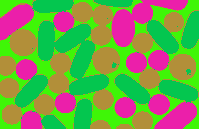

In [ ]:
img_fcm_6 = FCM_RGB_XY(img_3, 4)

cv2_imshow(img_fcm_6)

# Yêu cầu 2

In [ ]:
img_dir_5 = os.path.join(baitap6, 'Lionel-Messi.jpg')
img_dir_6 = os.path.join(baitap6, 'dogcat.jpg')

In [ ]:
def grabcut_img(path, x, y, w, h):
  # Đọc ảnh
  image = cv.imread(path)
  mask = np.zeros(image.shape[:2], np.uint8)

  # Tạo các mảng cho GrabCut
  bgdModel = np.zeros((1, 65), np.float64)
  fgdModel = np.zeros((1, 65), np.float64)

  rect = (x, y, w, h)

  # Áp dụng thuật toán GrabCut
  cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

  # Thay đổi mask để chỉ giữ lại đối tượng đã cắt
  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  image_cut = image * mask2[:, :, np.newaxis]

  # Hiển thị kết quả
  plt.figure(figsize=(24, 12))
  plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv.cvtColor(image_cut, cv.COLOR_BGR2RGB))
  plt.title('GrabCut Image'), plt.xticks([]), plt.yticks([])
  plt.show()


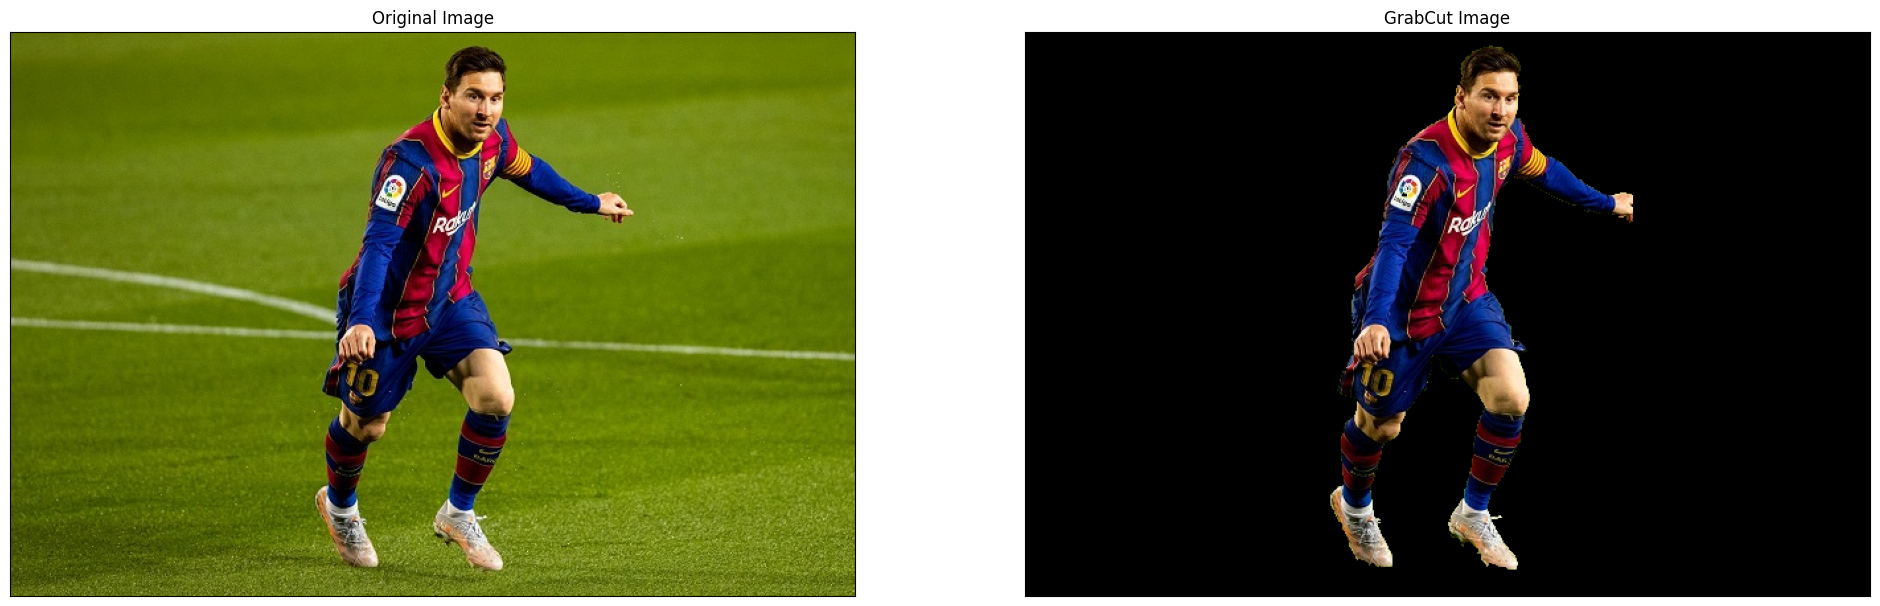

In [ ]:
grabcut_img(img_dir_5, 10, 10, 450, 400)

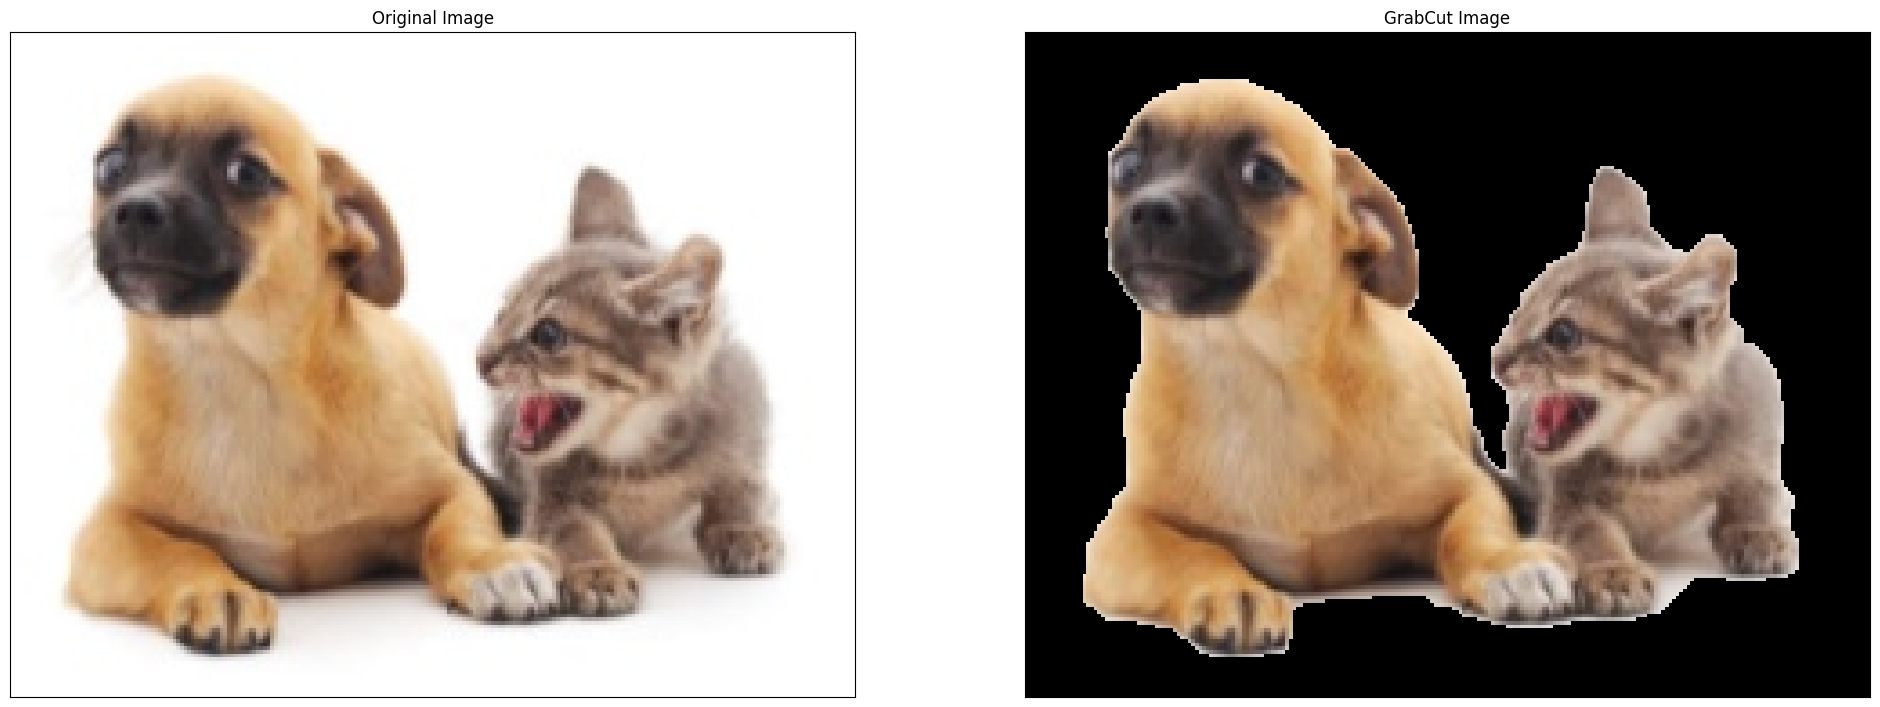

In [ ]:
grabcut_img(img_dir_6, 10, 10, 450, 400)

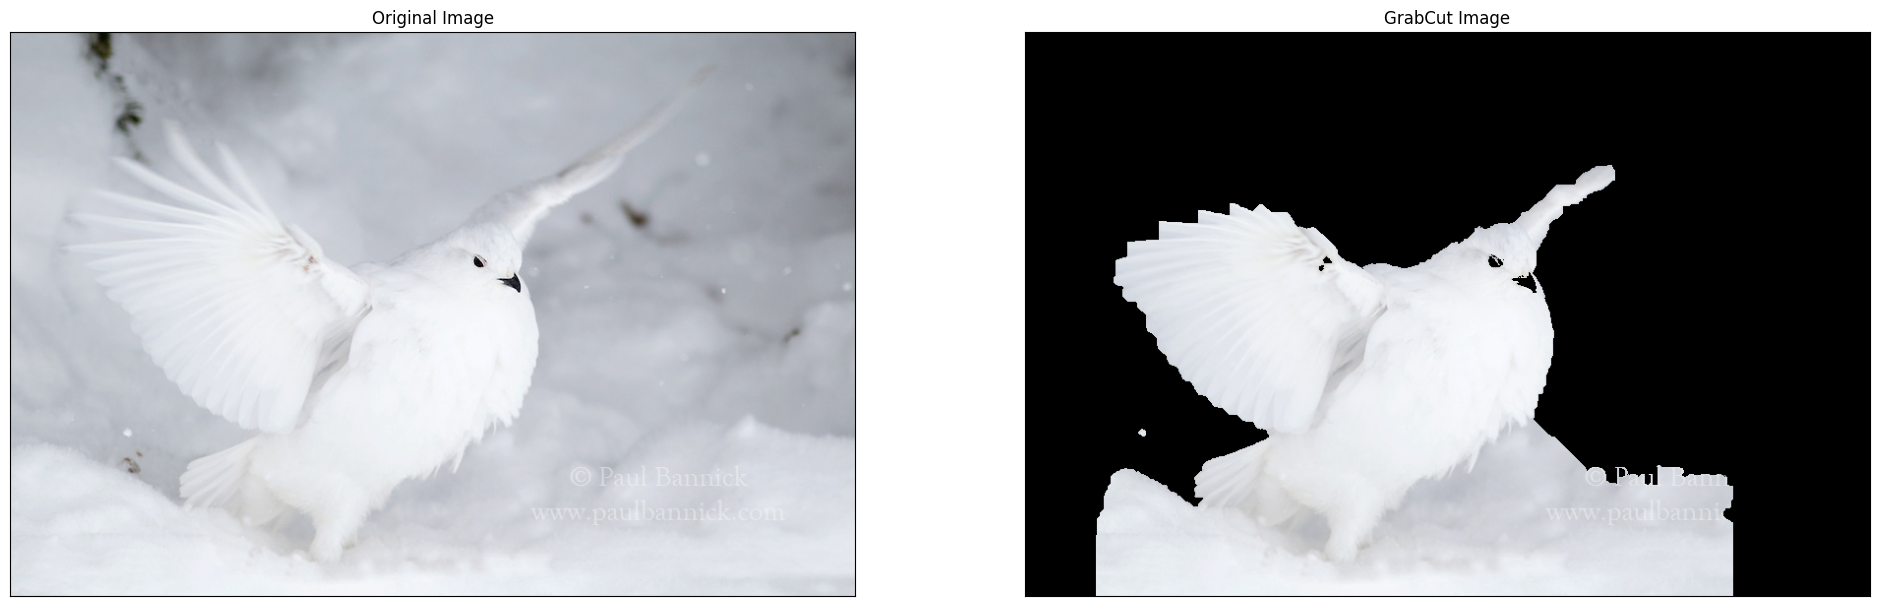

In [ ]:
img_dir_7 = os.path.join(baitap6, 'camourflage_00197.jpg')
grabcut_img(img_dir_7, 70, 80, 650, 500)

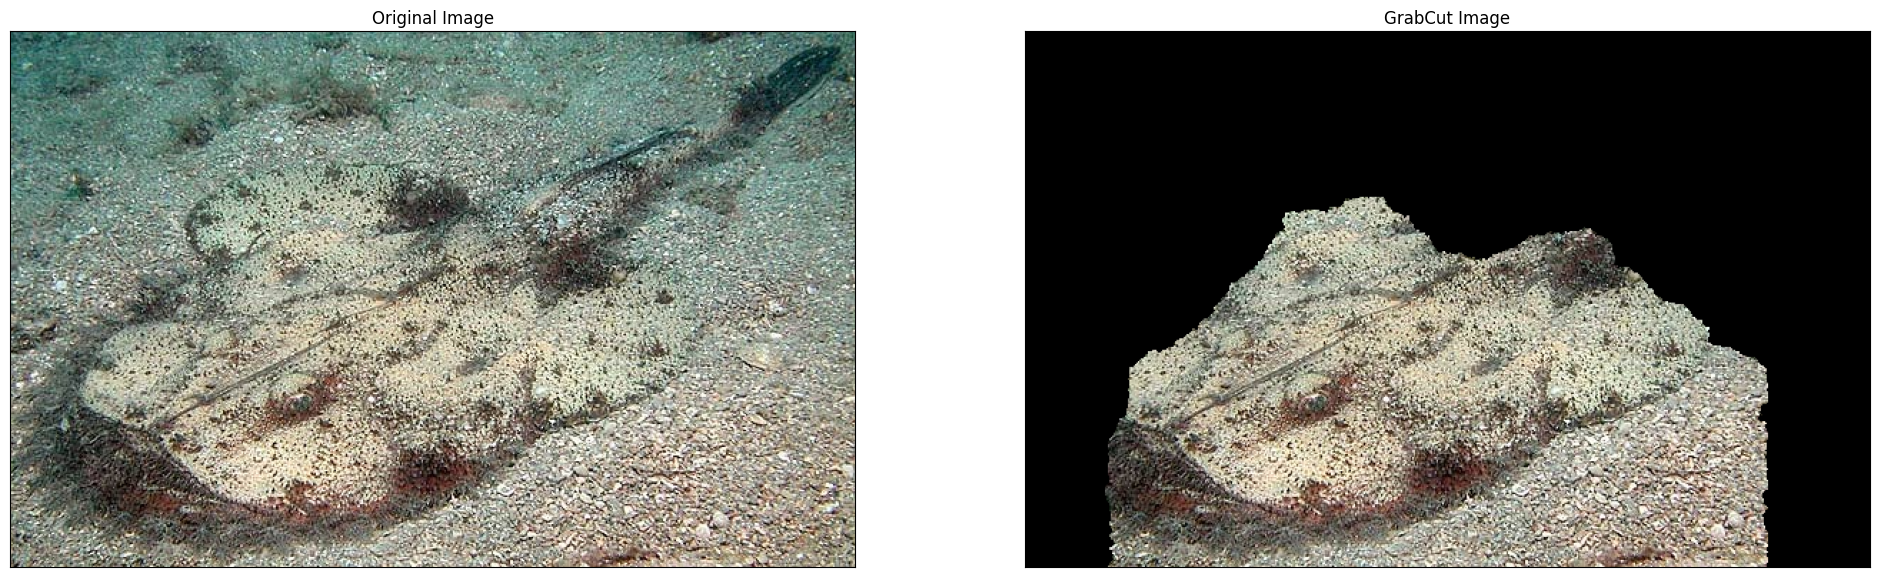

In [ ]:
img_dir_8 = os.path.join(baitap6, 'camourflage_00166.jpg')
grabcut_img(img_dir_8, 20, 20, 500, 400)

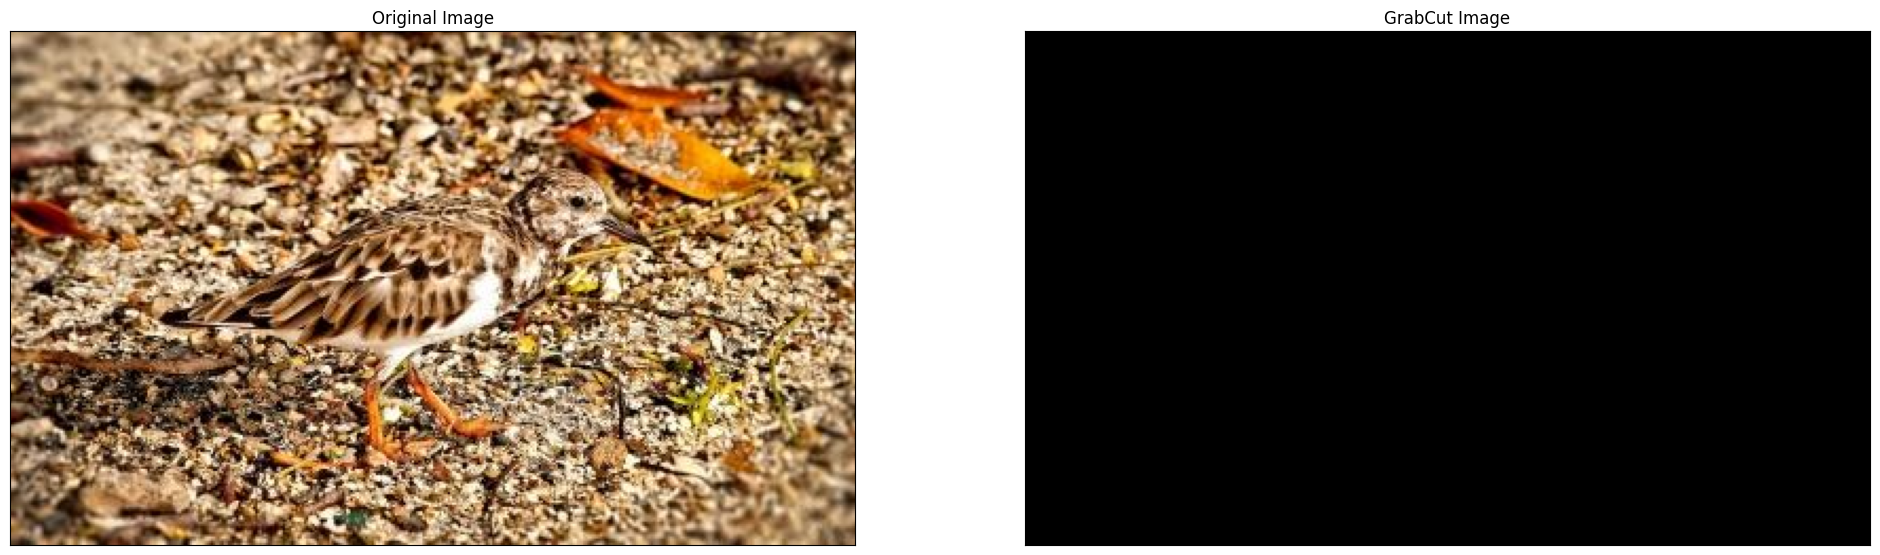

In [ ]:
img_dir_9 = os.path.join(baitap6, 'camourflage_00129.jpg')
grabcut_img(img_dir_9, 70, 100, 600, 250)

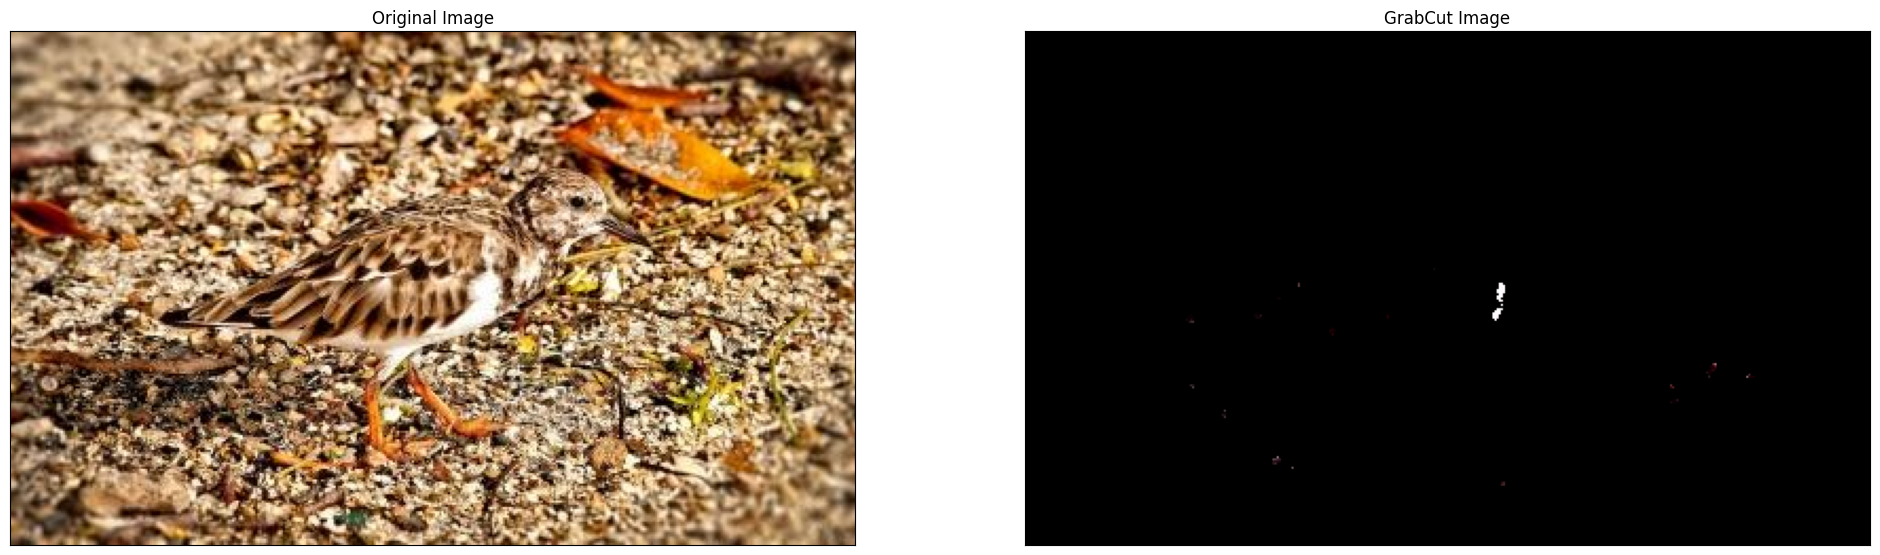

In [ ]:
# Đọc ảnh
image = cv.imread(img_dir_9)
image = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # Chuyển đổi sang không gian màu HSV

mask = np.zeros(image.shape[:2], np.uint8)

# Tạo các mảng cho GrabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (70, 100, 600, 250)

# Áp dụng thuật toán GrabCut
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Thay đổi mask để chỉ giữ lại đối tượng đã cắt
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image_cut = image * mask2[:, :, np.newaxis]

# Chuyển đổi lại sang không gian màu RGB để hiển thị
image_cut = cv.cvtColor(image_cut, cv.COLOR_HSV2RGB)

# Hiển thị kết quả
plt.figure(figsize=(24, 12))
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_HSV2RGB))  # Chuyển đổi lại sang RGB để hiển thị
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_cut)
plt.title('GrabCut Image'), plt.xticks([]), plt.yticks([])
plt.show()


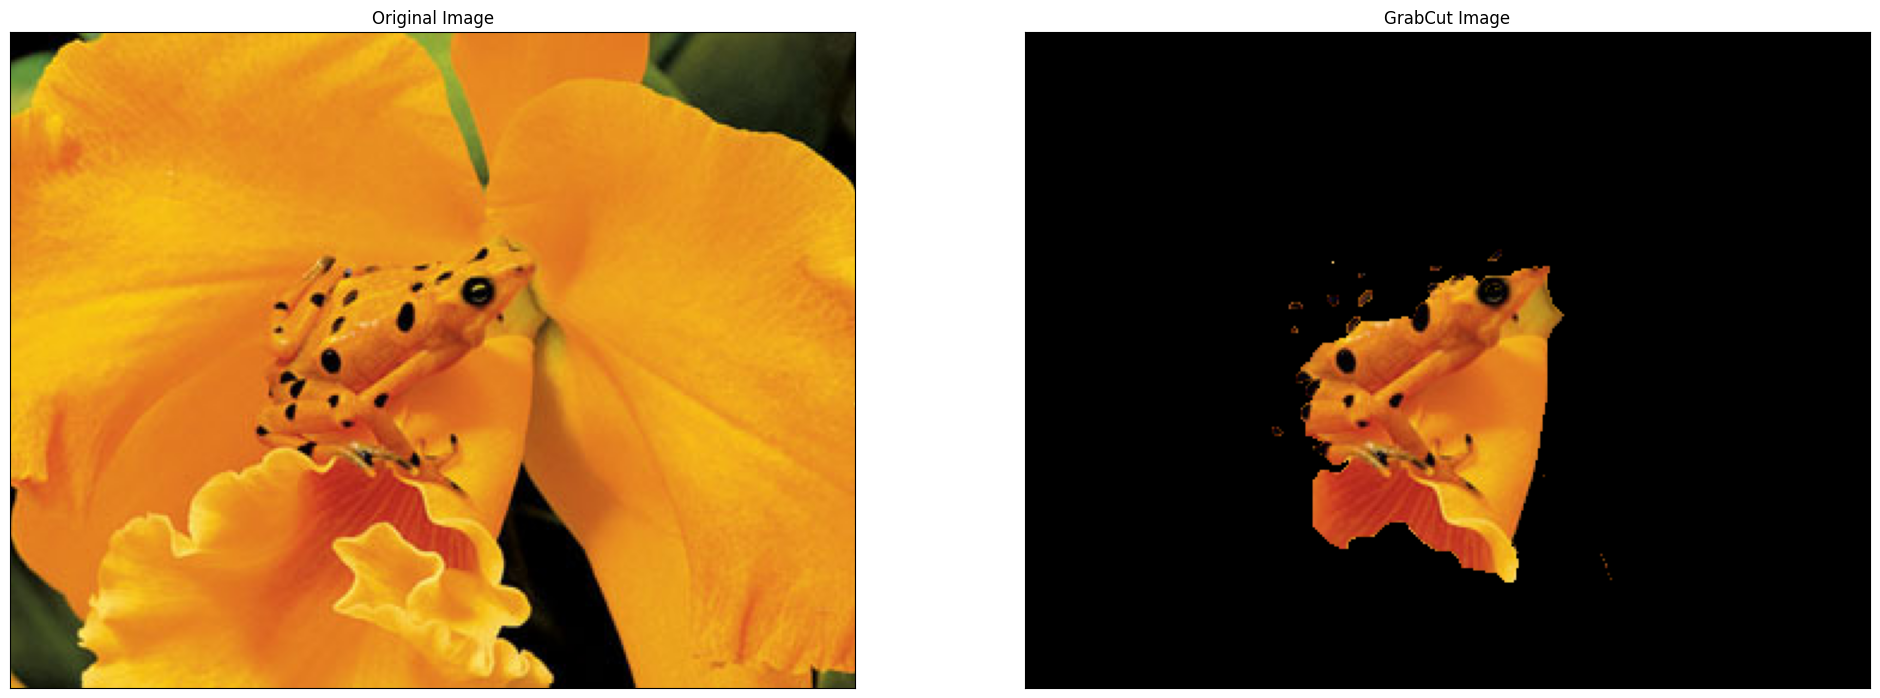

In [ ]:
img_dir_10 = os.path.join(baitap6, 'camourflage_00097.jpg')
grabcut_img(img_dir_10, 80, 80, 200, 150)

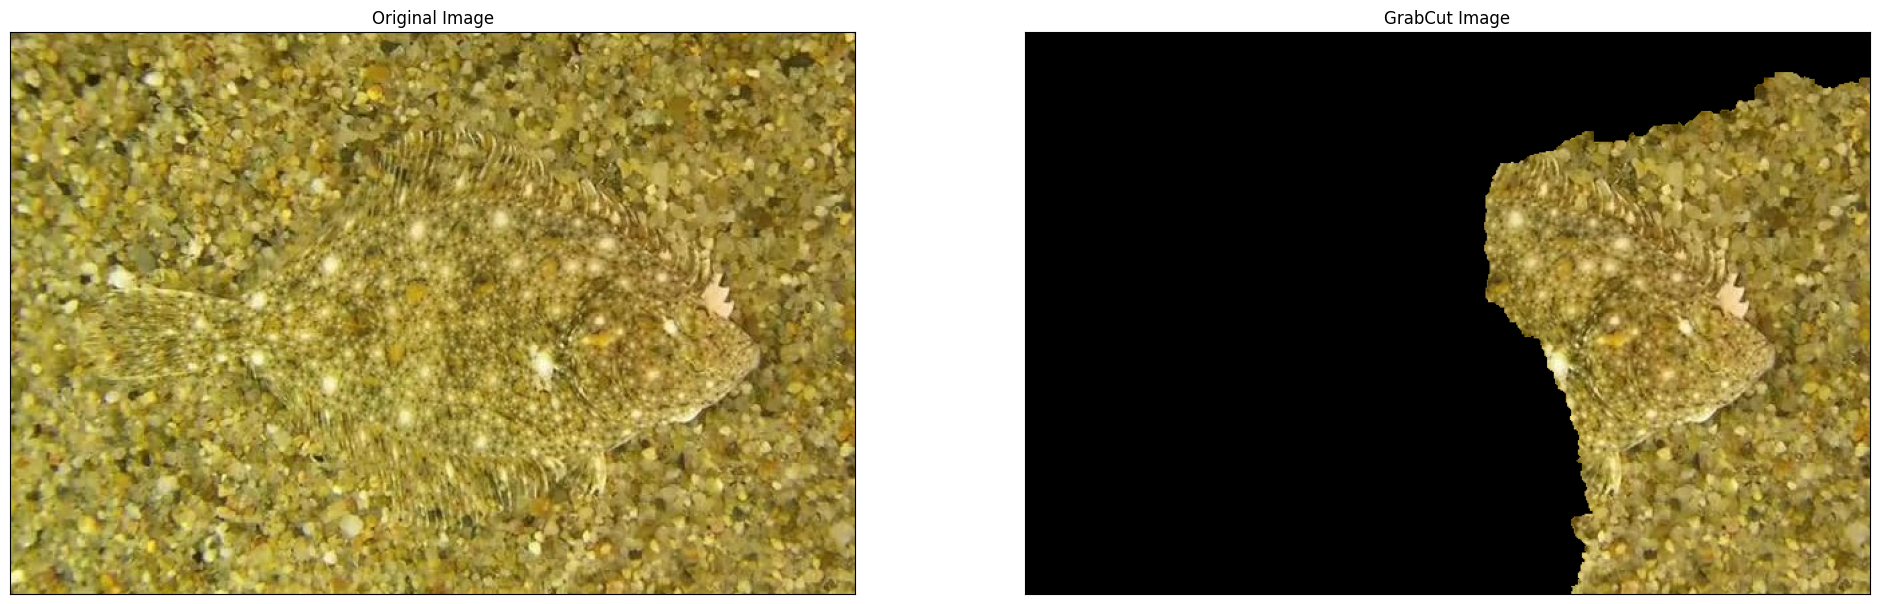

In [ ]:
img_dir_11 = os.path.join(baitap6, 'camourflage_00012.jpg')
grabcut_img(img_dir_11, 30, 30, 700, 400)